**Prediction of Drug Type**


👉 This dataset contains information about drug classification based on patient general information and its diagnosis. Machine learning model is needed in order to predict the outcome of the drugs type that might be suitable for the patient.

Objectives of Notebook 📌¶

👉 This notebook aims to:

Build various ML models that can predict drug type.

👨‍💻 The machine learning models used in this project are:

Linear Logistic Regression
Linear Support Vector Machine (SVM)
K Neighbours
Naive Bayes (Categorical & Gaussian)
Decision Tree
Random Forest

In [1]:
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv



--2024-12-23 15:22:58--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.89K  --.-KB/s    in 0s      

2024-12-23 15:22:58 (3.09 GB/s) - ‘drug200.csv’ saved [6027/6027]



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('drug200.csv')
data


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
data[data.isnull().any(axis=1)]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


In [5]:
categorical = [var for var in data.columns if data[var].dtype=='O']
numerical = [var for var in data.columns if data[var].dtype!='O']


print('There are {} categorical variables : \n'.format(len(categorical)), categorical)


There are 4 categorical variables : 
 ['Sex', 'BP', 'Cholesterol', 'Drug']


In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

data['Sex'] = encoder.fit_transform(data['Sex'])
data['BP'] =encoder.fit_transform(data['BP'])
data['Cholesterol']=encoder.fit_transform(data['Cholesterol'])
data['Drug']=encoder.fit_transform(data['Drug'])


In [7]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [8]:
# selecting variables
y = data.Drug # Target variable
X=data.drop(['Drug'],axis=1)

In [9]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [10]:
y.head()

,Drug
0,4
1,2
2,2
3,3
4,4


In [11]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=16)

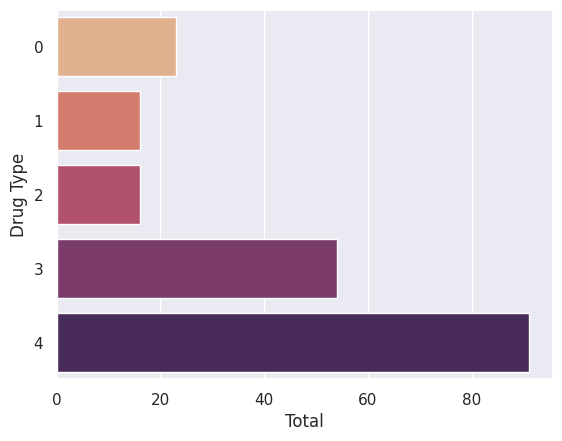

In [12]:
#Drug Type Distribution
sns.set_theme(style="darkgrid")
sns.countplot(y="Drug", hue="Drug",data=data, palette="flare",legend=False)
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

In [14]:
#SMOTE Technique

from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


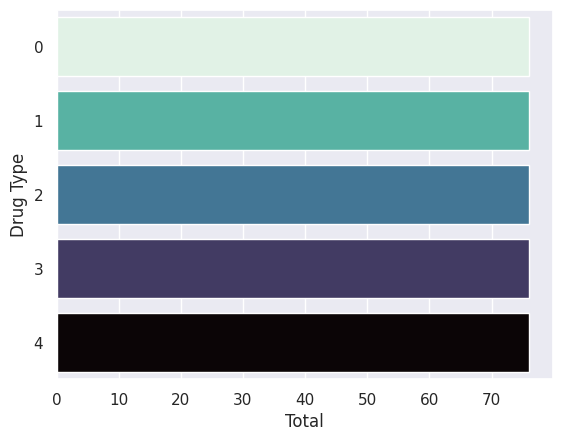

In [15]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train,hue=y_train, data=data, palette="mako_r",legend=False)
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train) # apply on whole x data
X_test=scaler.transform(X_test)


In [17]:
X_train

array([[ 1.32882835, -0.74230749,  1.68830233,  1.76930347, -0.95493041],
       [ 0.69975799, -0.74230749,  0.38167323, -0.56519417, -0.33144128],
       [-0.3696616 ,  1.34715063,  1.68830233, -0.56519417,  0.46179546],
       ...,
       [ 0.76266503,  1.34715063,  1.68830233, -0.56519417, -0.71512826],
       [ 1.45464242,  1.34715063,  0.38167323,  1.76930347, -0.42113477],
       [ 1.32882835, -0.74230749,  0.38167323,  1.76930347, -0.56852964]])

In [18]:
X_test

array([[-0.49547568,  1.34715063,  0.38167323,  1.76930347,  0.59784583],
       [-1.37617417, -0.74230749, -0.92495586, -0.56519417,  2.15314486],
       [-0.1809405 ,  1.34715063, -0.92495586,  1.76930347, -0.11538248],
       [-0.68419678,  1.34715063, -0.92495586, -0.56519417,  0.95445999],
       [-0.62128975,  1.34715063,  0.38167323,  1.76930347, -0.76337869],
       [-1.06163899, -0.74230749,  1.68830233, -0.56519417, -0.09501997],
       [-0.24384753, -0.74230749,  1.68830233,  1.76930347,  1.7116569 ],
       [-0.24384753,  1.34715063,  0.38167323, -0.56519417, -0.42694684],
       [ 0.00778061,  1.34715063,  0.38167323, -0.56519417,  0.81895021],
       [ 0.25940875,  1.34715063,  0.38167323,  1.76930347, -0.43109142],
       [ 1.07720021,  1.34715063,  1.68830233, -0.56519417,  0.57441994],
       [ 0.82557207, -0.74230749,  0.38167323, -0.56519417,  4.47627255],
       [ 1.45464242, -0.74230749, -0.92495586,  1.76930347, -0.57975574],
       [-0.1809405 , -0.74230749, -0.9

In [19]:
#Model Development and Prediction

In [20]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='liblinear', max_iter=5000)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)


In [21]:
# import the metrics class
from sklearn import metrics

confusion_matrix= metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 5,  0,  0,  0,  0],
       [ 0,  4,  0,  0,  0],
       [ 0,  1,  2,  0,  0],
       [ 0,  0,  0, 13,  0],
       [ 1,  0,  0,  0, 14]])

In [22]:
from sklearn.metrics import classification_report,accuracy_score
target_names = [' Drug A', 'Drug B', 'Drug C', 'Drug X','Drug Y']
print(classification_report(y_test, y_pred,target_names =target_names ))


lr = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(lr*100))


              precision    recall  f1-score   support

      Drug A       0.83      1.00      0.91         5
      Drug B       0.80      1.00      0.89         4
      Drug C       1.00      0.67      0.80         3
      Drug X       1.00      1.00      1.00        13
      Drug Y       1.00      0.93      0.97        15

    accuracy                           0.95        40
   macro avg       0.93      0.92      0.91        40
weighted avg       0.96      0.95      0.95        40

Logistic Regression accuracy is: 95.00%


In [24]:
#K Neighbors

from sklearn.neighbors import KNeighborsClassifier
Kclassifier = KNeighborsClassifier(n_neighbors=2, p=2, metric='minkowski')
Kclassifier.fit(X_train, y_train)
y_pred = Kclassifier.predict(X_test)

confusion_matrix= metrics.confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(confusion_matrix)

KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))


              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.75      0.86         4
           2       1.00      1.00      1.00         3
           3       0.81      1.00      0.90        13
           4       1.00      0.73      0.85        15

    accuracy                           0.88        40
   macro avg       0.91      0.90      0.89        40
weighted avg       0.90      0.88      0.87        40

[[ 5  0  0  0  0]
 [ 1  3  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 13  0]
 [ 1  0  0  3 11]]
K Neighbours accuracy is: 87.50%


In [26]:
# SVM

from sklearn.svm import SVC
SVCclassifier = SVC(kernel='linear', max_iter=251)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

confusion_matrix= metrics.confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(confusion_matrix)

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

[[ 5  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 13  0]
 [ 0  0  0  0 15]]
SVC accuracy is: 100.00%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=251).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [28]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
Dclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
Dclassifier.fit(X_train, y_train)
y_pred=Dclassifier.predict(X_test)

confusion_matrix= metrics.confusion_matrix(y_test, y_pred)
target_names = [' Drug A', 'Drug B', 'Drug C', 'Drug X','Drug Y']
print(classification_report(y_test, y_pred,target_names=target_names))
print(confusion_matrix)

dt = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(dt*100))


              precision    recall  f1-score   support

      Drug A       1.00      1.00      1.00         5
      Drug B       1.00      1.00      1.00         4
      Drug C       1.00      1.00      1.00         3
      Drug X       1.00      0.92      0.96        13
      Drug Y       0.94      1.00      0.97        15

    accuracy                           0.97        40
   macro avg       0.99      0.98      0.99        40
weighted avg       0.98      0.97      0.97        40

[[ 5  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 12  1]
 [ 0  0  0  0 15]]
Decision Tree accuracy is: 97.50%


In [29]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
RFclass=RandomForestClassifier()
RFclass.fit(X_train,y_train)
y_pred=RFclass.predict(X_test)

confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred,target_names=target_names))
print(confusion_matrix)

from sklearn.metrics import accuracy_score
RFac=accuracy_score(y_pred,y_test)
print("Random Forest accuracy is: {:.2f}%".format(RFac*100))

              precision    recall  f1-score   support

      Drug A       1.00      1.00      1.00         5
      Drug B       1.00      1.00      1.00         4
      Drug C       1.00      1.00      1.00         3
      Drug X       1.00      0.92      0.96        13
      Drug Y       0.94      1.00      0.97        15

    accuracy                           0.97        40
   macro avg       0.99      0.98      0.99        40
weighted avg       0.98      0.97      0.97        40

[[ 5  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 12  1]
 [ 0  0  0  0 15]]
Random Forest accuracy is: 97.50%


In [30]:
# Categorical NB

import numpy as np
from sklearn.naive_bayes import CategoricalNB
NBclassifier1 = CategoricalNB()

# Find the indices of negative values in X_train
negative_indices = np.where(X_train < 0)

# Replace negative values with zeros
X_train[negative_indices] = 0

# Find the indices of negative values in X_train
negative_indices = np.where(X_test < 0)

# Replace negative values with zeros
X_test[negative_indices] = 0

NBclassifier1.fit(X_train, y_train)
y_pred = NBclassifier1.predict(X_test)

confusion_matrix= metrics.confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(confusion_matrix)

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Naive Bayes accuracy is: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

           0       0.28      1.00      0.43         5
           1       0.25      0.25      0.25         4
           2       0.00      0.00      0.00         3
           3       0.83      0.38      0.53        13
           4       0.82      0.60      0.69        15

    accuracy                           0.50        40
   macro avg       0.44      0.45      0.38        40
weighted avg       0.64      0.50      0.51        40

[[5 0 0 0 0]
 [2 1 0 0 1]
 [2 1 0 0 0]
 [5 2 0 5 1]
 [4 0 1 1 9]]
Naive Bayes accuracy is: 50.00%


In [31]:
# Gaussian NB

import numpy as np
from sklearn.naive_bayes import GaussianNB
NBclassifier2 = GaussianNB()

NBclassifier2.fit(X_train, y_train)
y_pred = NBclassifier2.predict(X_test)

confusion_matrix= metrics.confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(confusion_matrix)

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Naive Bayes accuracy is: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      0.92      0.96        13
           4       0.94      1.00      0.97        15

    accuracy                           0.97        40
   macro avg       0.99      0.98      0.99        40
weighted avg       0.98      0.97      0.97        40

[[ 5  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 12  1]
 [ 0  0  0  0 15]]
Naive Bayes accuracy is: 97.50%


In [32]:
# Model Comparision

import pandas as pd

# Define the data
data = {
        'Model': ['Linear regression', 'K neighbours',' SVM', 'Decision Tree', 'Random Forest', 'Categorical NB', 'Gaussian NB'],
        'Accuracy': [lr*100, KNAcc*100, SVCAcc*100, dt*100, RFac*100, NBAcc1*100,NBAcc2*100]}

# Create the DataFrame
df = pd.DataFrame(data)
#Display the the dataframe
print(df.sort_values(by='Accuracy',ascending=False))

               Model  Accuracy
2                SVM     100.0
3      Decision Tree      97.5
4      Random Forest      97.5
6        Gaussian NB      97.5
0  Linear regression      95.0
1       K neighbours      87.5
5     Categorical NB      50.0


*As per result, it is cleared that ML models can reach more than 90% accuracy in predicting classification of drug type. *